# HOTEL BOOKING PREDICTION

# Required libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams['figure.figsize'] = [15, 6]
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import PowerTransformer

In [59]:
# reading the dataset

In [172]:
df = pd.read_csv('hotel_bookings.csv')

In [61]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
df.shape

(119390, 32)

In [63]:
# there are 119390 rows and 32 columns in this dataset

In [64]:
df.info() # checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [65]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Pre processing

In [66]:
# changing the columns to object datatype as they are categorical variables

In [67]:
df['agent'] = df['agent'].astype('object')

In [68]:
df[['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month']] = df[['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month']].astype(object)

In [69]:
df[['is_canceled','is_repeated_guest']] = df[['is_canceled','is_repeated_guest']].astype(object)

In [70]:
# dropping the redundant column reservation status as it provides the same meaning as is cancelled

In [71]:
df = df.drop('reservation_status',axis=1)

# Missing value analysis

In [72]:
# checking for null values
# missing value analysis

In [73]:
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [74]:
# as there are more than 90 percent missing values in the column agent, we are dropping the column

In [75]:
df = df.drop('company',axis=1)

In [76]:
# as the column country a categorical variable we are using mode to impute the null values

In [77]:
df["country"]=df["country"].fillna(df["country"].mode()[0])

In [78]:
# filling in the column children with median

In [79]:
df["children"]=df["children"].fillna(df["children"].median())

In [80]:
# filling in the column agent with mode as it is of object data type

In [81]:
df['agent'].mode()

0    9.0
Name: agent, dtype: object

In [82]:
df.loc[df['agent'].isnull(),'agent'] = 9.0

# Seperating the numerical and categorical columns

In [83]:
numerical = df.select_dtypes(include=np.number)

In [84]:
categorical = df.select_dtypes(exclude=np.number)

In [85]:
numerical.describe()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,0.927599,2.500302,1.856403,0.103886,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.998613,1.908286,0.579261,0.398555,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [86]:
categorical.describe()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390.0,119390,119390
unique,2,2,3,12,53,31,5,177,8,5,2,10,12,3,333.0,4,926
top,City Hotel,0,2016,August,33,17,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,9.0,Transient,2015-10-21
freq,79330,75166,56707,13877,3580,4406,92310,49078,56477,97870,115580,85994,74053,104641,48301.0,89613,1461


# EDA

# No of cancellations

In [87]:
print((df['is_canceled'].value_counts()))

0    75166
1    44224
Name: is_canceled, dtype: int64


In [88]:
print((df['is_canceled'].value_counts(normalize=True)*100))

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


There are around 44224 cancellations which accounts for 37 percent of the total cancellations

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  object 
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  object 
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<Axes: xlabel='lead_time', ylabel='Density'>

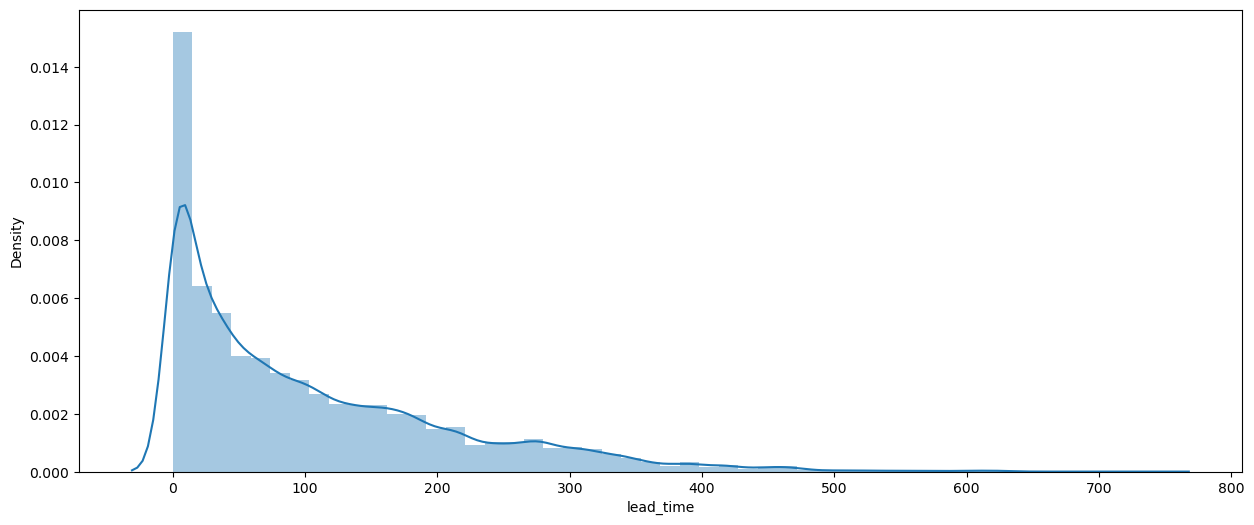

In [90]:
sns.distplot(df['lead_time'])

# To find the country where maximum no of bookings occured

In [91]:
df['country'].value_counts(normalize=True)*100

PRT    41.107295
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
         ...    
DJI     0.000838
BWA     0.000838
HND     0.000838
VGB     0.000838
NAM     0.000838
Name: country, Length: 177, dtype: float64

we can see that the maximum number of bookings occured from Portugal, followed by Great Britain

<Axes: >

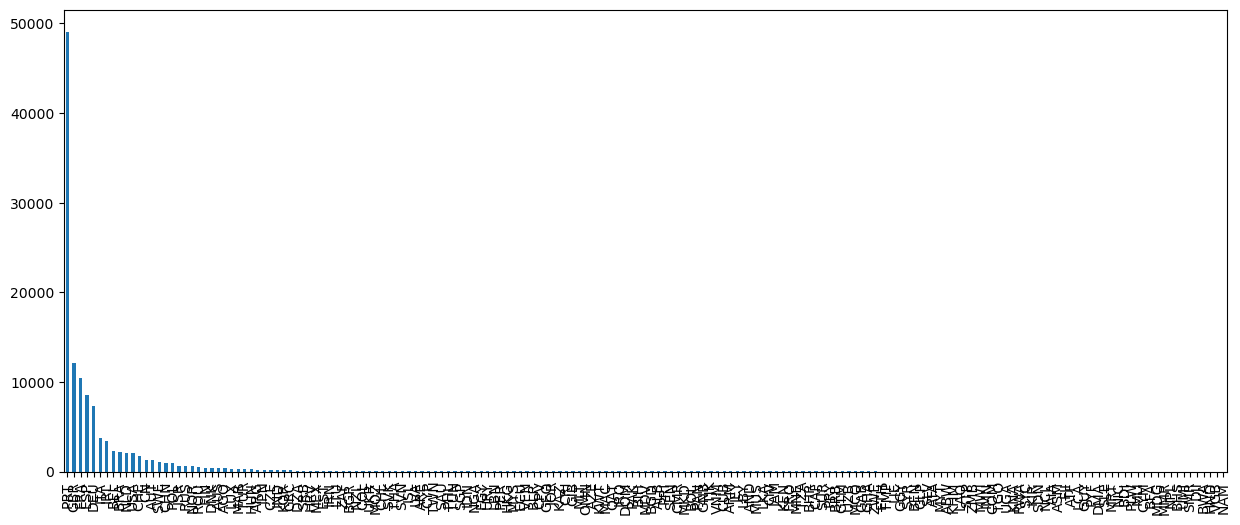

In [92]:
a = df['country'].value_counts()
a.plot(kind='bar')

# To find the year and month when most of the bookings occured

In [93]:
b = df['arrival_date_year'].value_counts(normalize=True)*100

<Axes: >

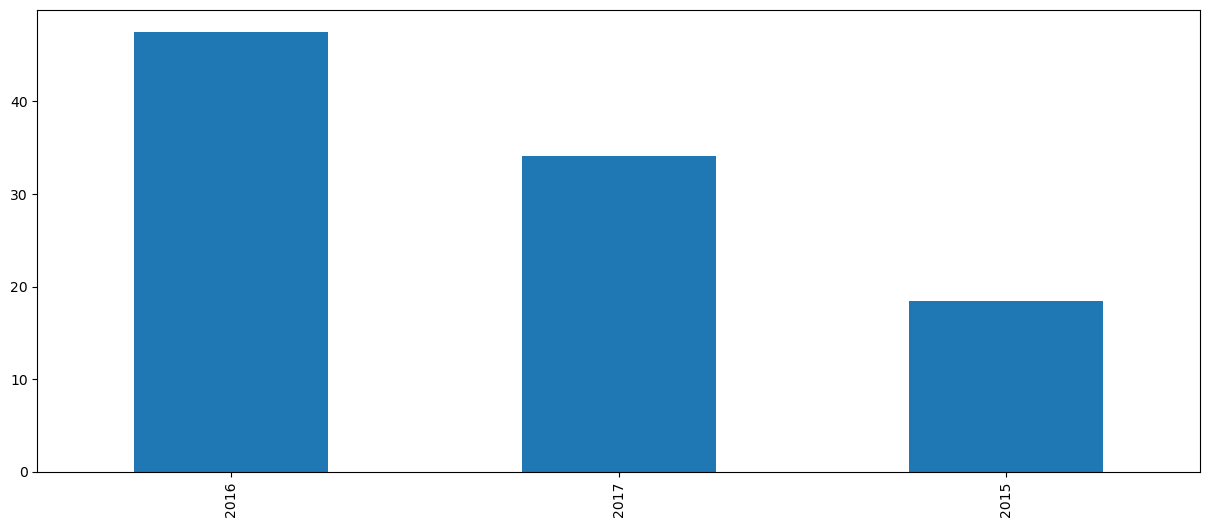

In [94]:
b.plot(kind='bar')

The maximum number of bookings were done in the year 2016

In [95]:
df['arrival_date_month'].value_counts(normalize=True)*100

August       11.623252
July         10.604741
May           9.876037
October       9.347517
April         9.288048
June          9.162409
September     8.801407
March         8.203367
February      6.757685
November      5.690594
December      5.678868
January       4.966078
Name: arrival_date_month, dtype: float64

The month of August has the maxmimum number of bookings

# Market segment

In [96]:
df['market_segment'].value_counts(normalize=True)*100

Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: market_segment, dtype: float64

47 percent of the people have booked through online travel agency

# Data visualization

<Axes: xlabel='hotel', ylabel='lead_time'>

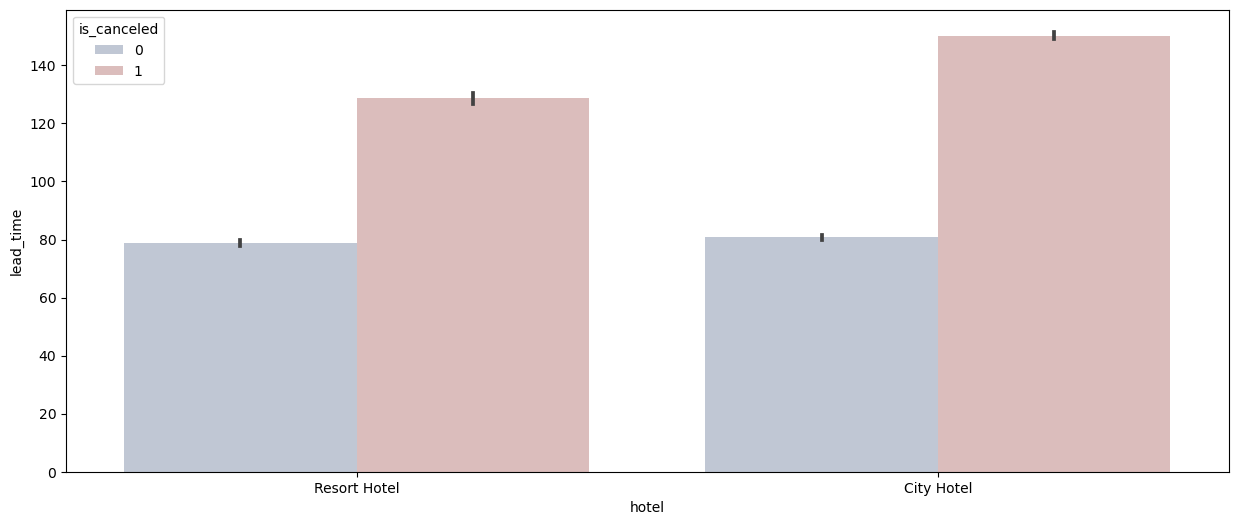

In [97]:
sns.barplot(x=df['hotel'],y=df['lead_time'],hue=df['is_canceled'],palette = 'vlag')

In both the hotels the bookings with more than lead time of 80 have higher chances of cancellations

<Axes: xlabel='is_canceled', ylabel='count'>

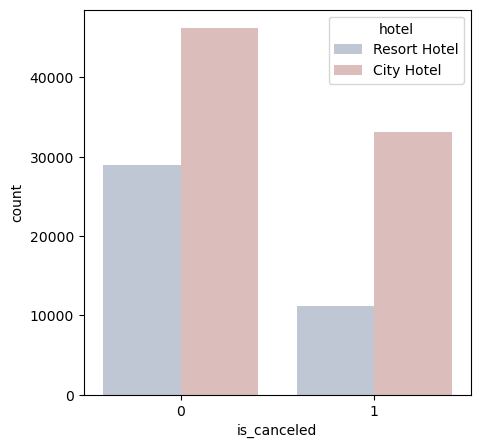

In [98]:
plt.figure(figsize=(5,5))
sns.countplot(x = df['is_canceled'],palette='vlag',hue=df['hotel'])

In the cancelled bookings we can see that more number of cancellations occured at City hotel

<Axes: xlabel='customer_type', ylabel='count'>

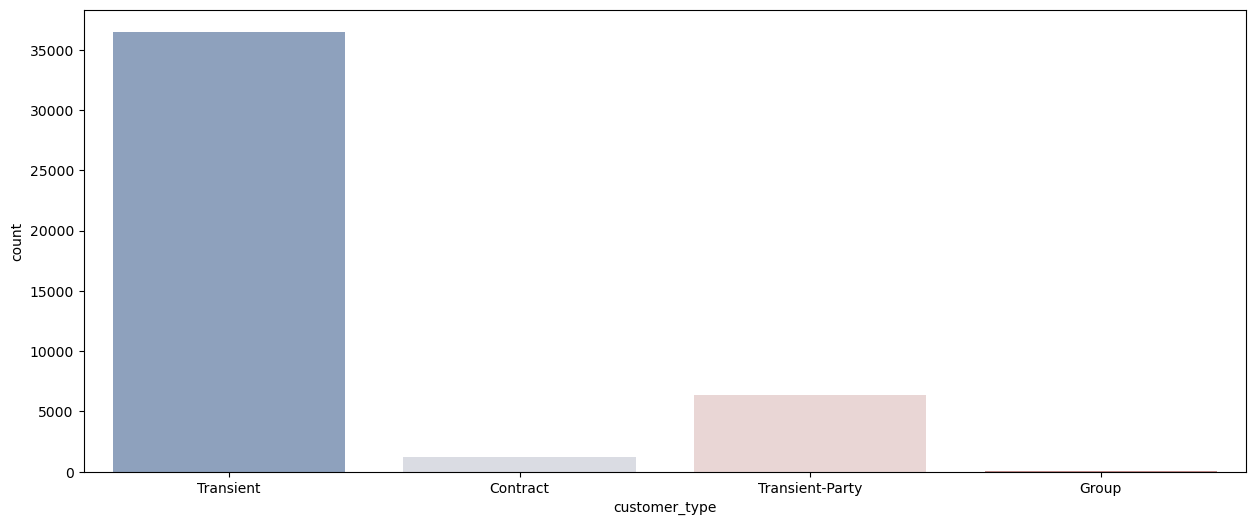

In [99]:
cancelled = df[df['is_canceled']==1]
sns.countplot(x=cancelled['customer_type'],palette='vlag')

The ones with customer_type as transient are the ones with a short stay who have no special requirements, notably the cancellations are higher for the transient customer_types

# Assumption-1

The earlier the booking made, higher the chances of cancellation.

<Axes: xlabel='lead_time', ylabel='Count'>

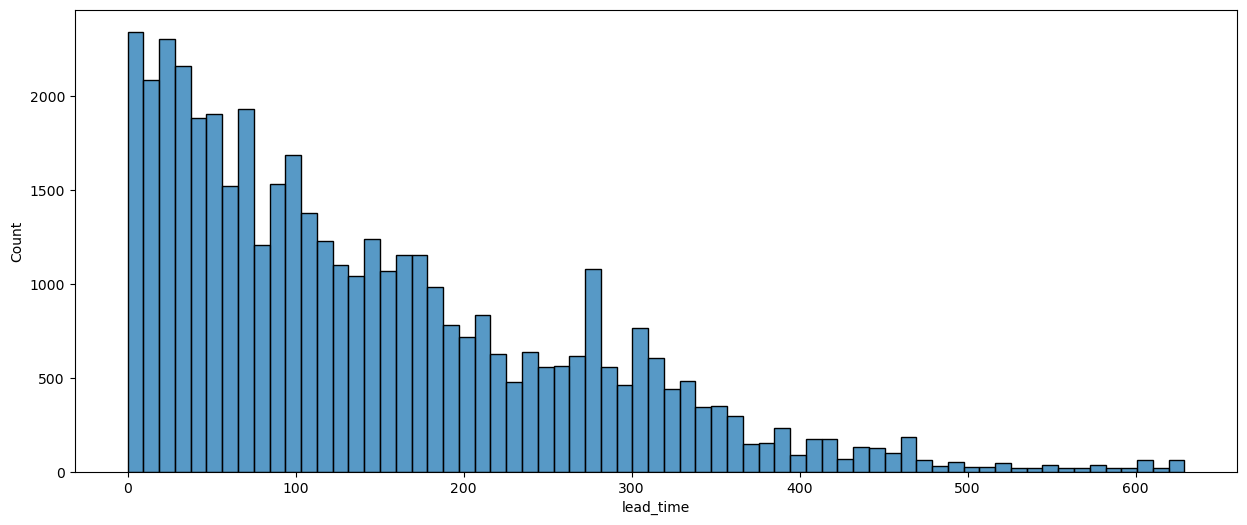

In [100]:
sns.histplot(cancelled['lead_time'])

## Inference
Higher the lead time lesser the cancellation, this disapproves our assumption 1

In [101]:
# hypothesis testing 
# H0 - null hypothesis - higher the lead time lower the chances of cancellation
# H1 - alternate hypotesis - higher the lead time higher the chances of cancellation 
# right tailed test

In [102]:
cancelled = df[df['is_canceled'] == 1]['lead_time']
not_cancelled = df[df['is_canceled'] == 0]['lead_time']

In [103]:
stats.ttest_ind(a=not_cancelled,b=cancelled,alternative='greater')

Ttest_indResult(statistic=-105.93487739055686, pvalue=1.0)

Failed to reject null hypothesis.
Failing to reject the null hypothesis confirms that our assumption that earlier the bookings made (higher lead time), higher the chances of cancellation

# Assumption - 2

If there are high previous cancellations, possibility of cancellation of current booking is also high.

In [104]:
previously_cancelled = df[df['previous_cancellations'] >= 1]

<Axes: xlabel='previous_cancellations', ylabel='count'>

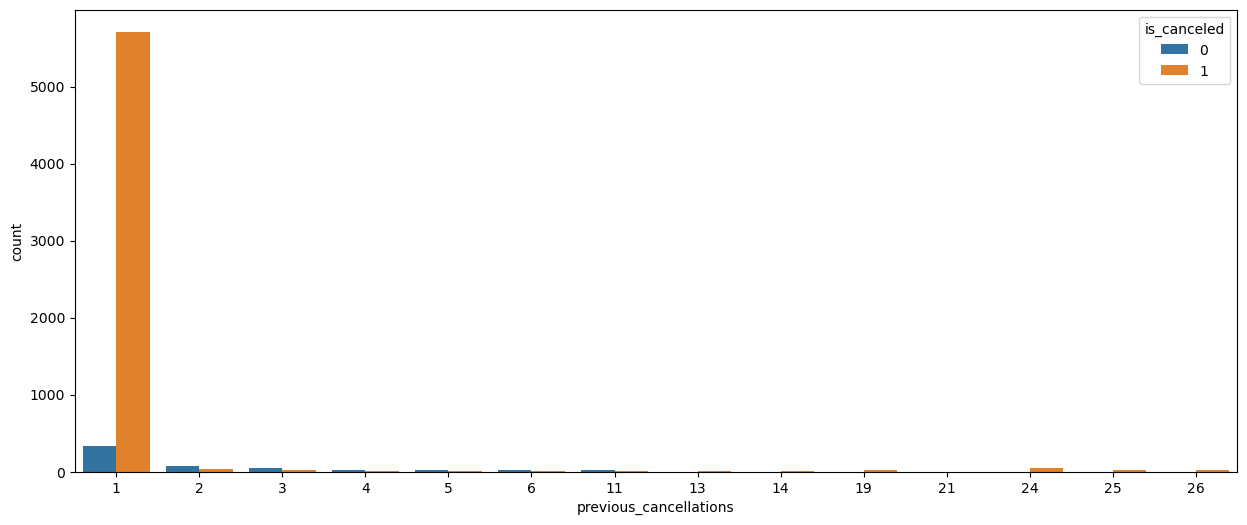

In [105]:
sns.countplot(x=previously_cancelled['previous_cancellations'],hue=previously_cancelled['is_canceled'])

## Inference

The customers who have booked earlier and the customers who have previously cancelled have a high chance to cancel their booking

In [106]:
# hypothesis
# H0 - null hypothesis
# The cancellation status of the current booking is independant of the previous cancellation.
# H1 - alternate hypothesis
# The cancellation status of the current booking is dependant of the previous cancellation.

In [107]:
cancelled = previously_cancelled[previously_cancelled['is_canceled'] == 1]['previous_cancellations']
not_cancelled = previously_cancelled[previously_cancelled['is_canceled'] == 0]['previous_cancellations']

In [108]:
stats.ttest_ind(a=not_cancelled,b=cancelled,alternative='greater')

Ttest_indResult(statistic=4.363347991353643, pvalue=6.503687652056302e-06)

Rejecting null hypothesis, states that the current booking is dependant on the previous cancellation

# Assumption - 3

If room assigned is not the same as reserved room type, customer might positively cancel the booking

In [109]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

## Inference 

There are more cancellations when assigned room type is different from reserved room type is not valid. There are only 5% cancellations in such a case.

# Assumption - 4

Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.

<Axes: xlabel='booking_changes', ylabel='count'>

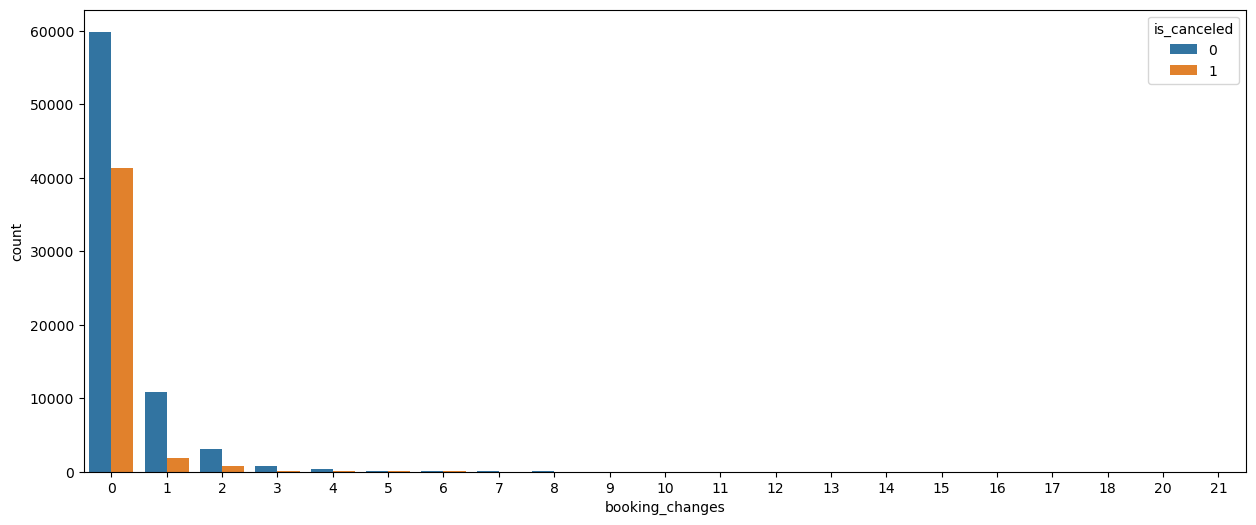

In [110]:
sns.countplot(data=df, x='booking_changes', hue='is_canceled')

## Inference

The bookings does not hold as there is no trend in it's impact on the cancellation of bookings.

In [111]:
# Hypothesis
# null - people with more changes have cancelled the booking
# alternate - people with more changes have not cancelled the booking

In [112]:
changes = df[df['booking_changes'] > 1]

In [113]:
not_cancelled = changes[changes['is_canceled'] == 0]['booking_changes']
cancelled = changes[changes['is_canceled'] == 1]['booking_changes']

In [114]:
stats.ttest_ind(a=not_cancelled,b=cancelled,alternative='less')

Ttest_indResult(statistic=1.9535777521477449, pvalue=0.9745985018985022)

Failed to reject null hypothesis, people with changes have cancelled the booking, which justifies our assumption

# Asumption - 5

Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.

<Axes: xlabel='deposit_type', ylabel='count'>

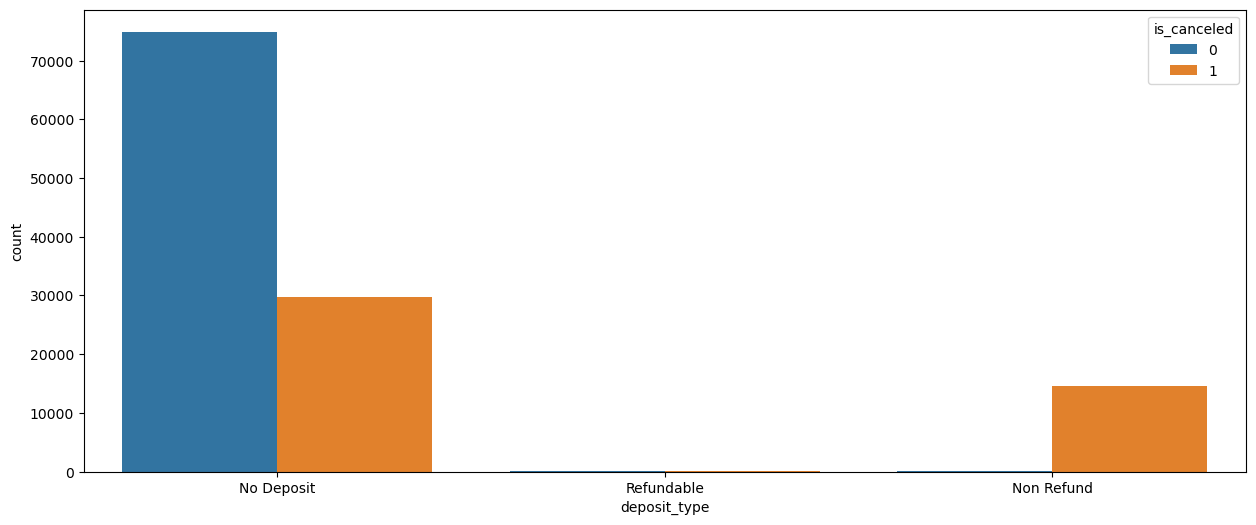

In [115]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df)

## Inference
Most of the people with non refundable deposit type have cancelled

# Assumption - 6

Maximum booking occured in a year

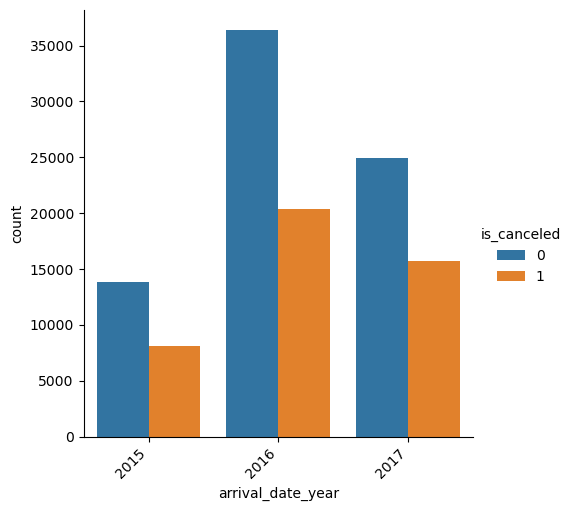

In [116]:
chart = sns.catplot(data=df, x='arrival_date_year', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=45, horizontalalignment='right')

## Inference 

From the above graph we could infer that the maximum number of bookings has ocured in the Year 2016

# Assumption - 7

Type of hotels that have longer waiting period

<Figure size 2900x600 with 0 Axes>

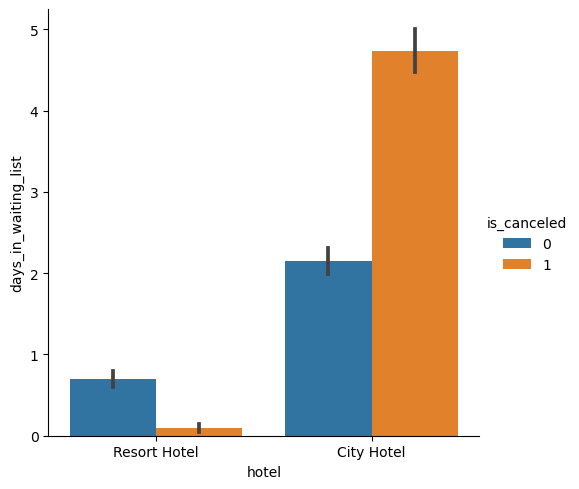

In [117]:
fig=plt.figure(figsize=(29,6))
sns.catplot(data=df, x='hotel', y='days_in_waiting_list',hue='is_canceled',kind='bar')

## Inference

city hotels have much larger waiting time in days compared to resort hotels which may signify that their demad is higher.

In [118]:
city_hotel = df[df['hotel'] == 'City Hotel']['days_in_waiting_list']
Resort_hotel = df[df['hotel'] == 'Resort Hotel']['days_in_waiting_list']

In [119]:
# Hypothesis testing
# H0 - City hotel has more waiting period
# H1 - Resort hotel has more waiting period

In [120]:
stats.ttest_ind(a=city_hotel,b=Resort_hotel,alternative='less')

Ttest_indResult(statistic=25.093064562539695, pvalue=1.0)

Failed to reject null hypothesis, the same can be observed from the graph that the city hotel has more waiting days

# Assumption - 8

Type of customers that cancelled most

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


<Axes: xlabel='customer_type', ylabel='count'>

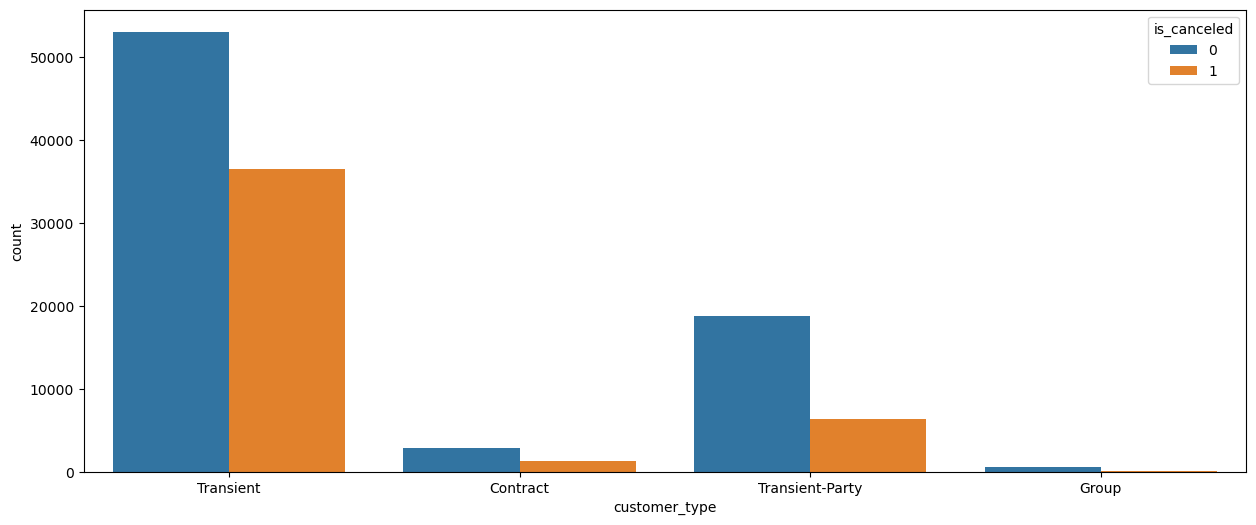

In [121]:
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

## Inference 

75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories

# Assumption - 9

Month in every year with most cancelations

<Axes: xlabel='arrival_date_year,arrival_date_month'>

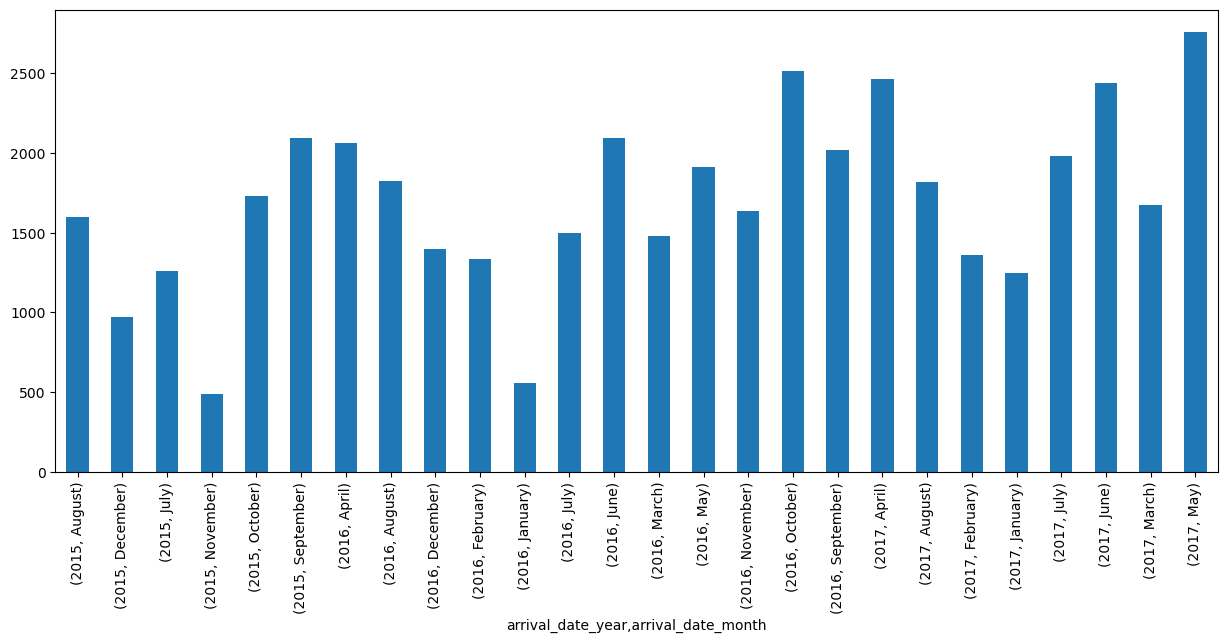

In [122]:
cancelled = df[df['is_canceled']==1]

cancelled.groupby(['arrival_date_year','arrival_date_month'])['is_canceled'].count().plot(kind='bar')

## Inference

1. For the year 2015 it is observed that the maximum number of cancellations occured in the month of september.
2. For the year 2016 it is observed that the maximum number of cancellations occured in the month of October.
3. For the year 2017 it is observed that the maximum number of cancellations occured in the month of May.

# Outlier detection

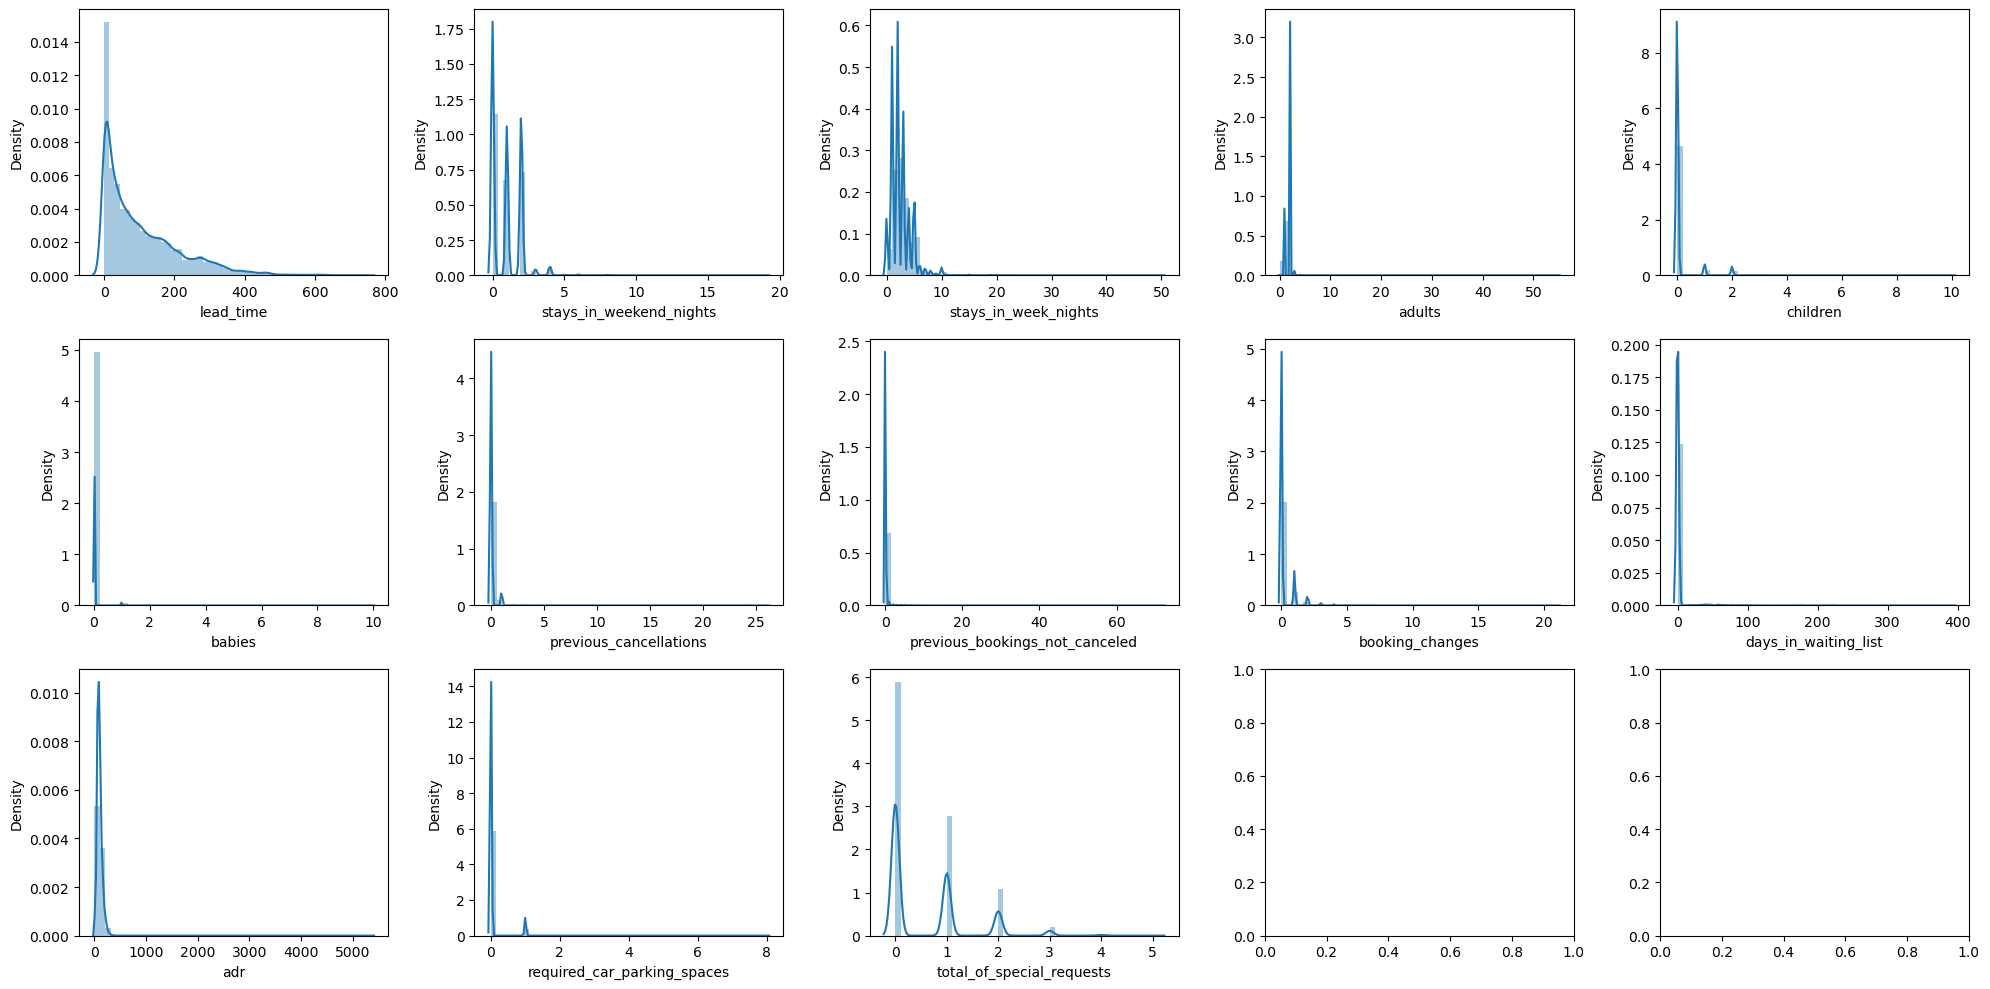

In [123]:
fig, ax= plt.subplots(3,5, figsize=(20,10))

for i, subplot in zip(numerical.columns, ax.flatten()):
    sns.distplot(df[i], ax=subplot,kde=True)
    
plt.tight_layout()
plt.show()

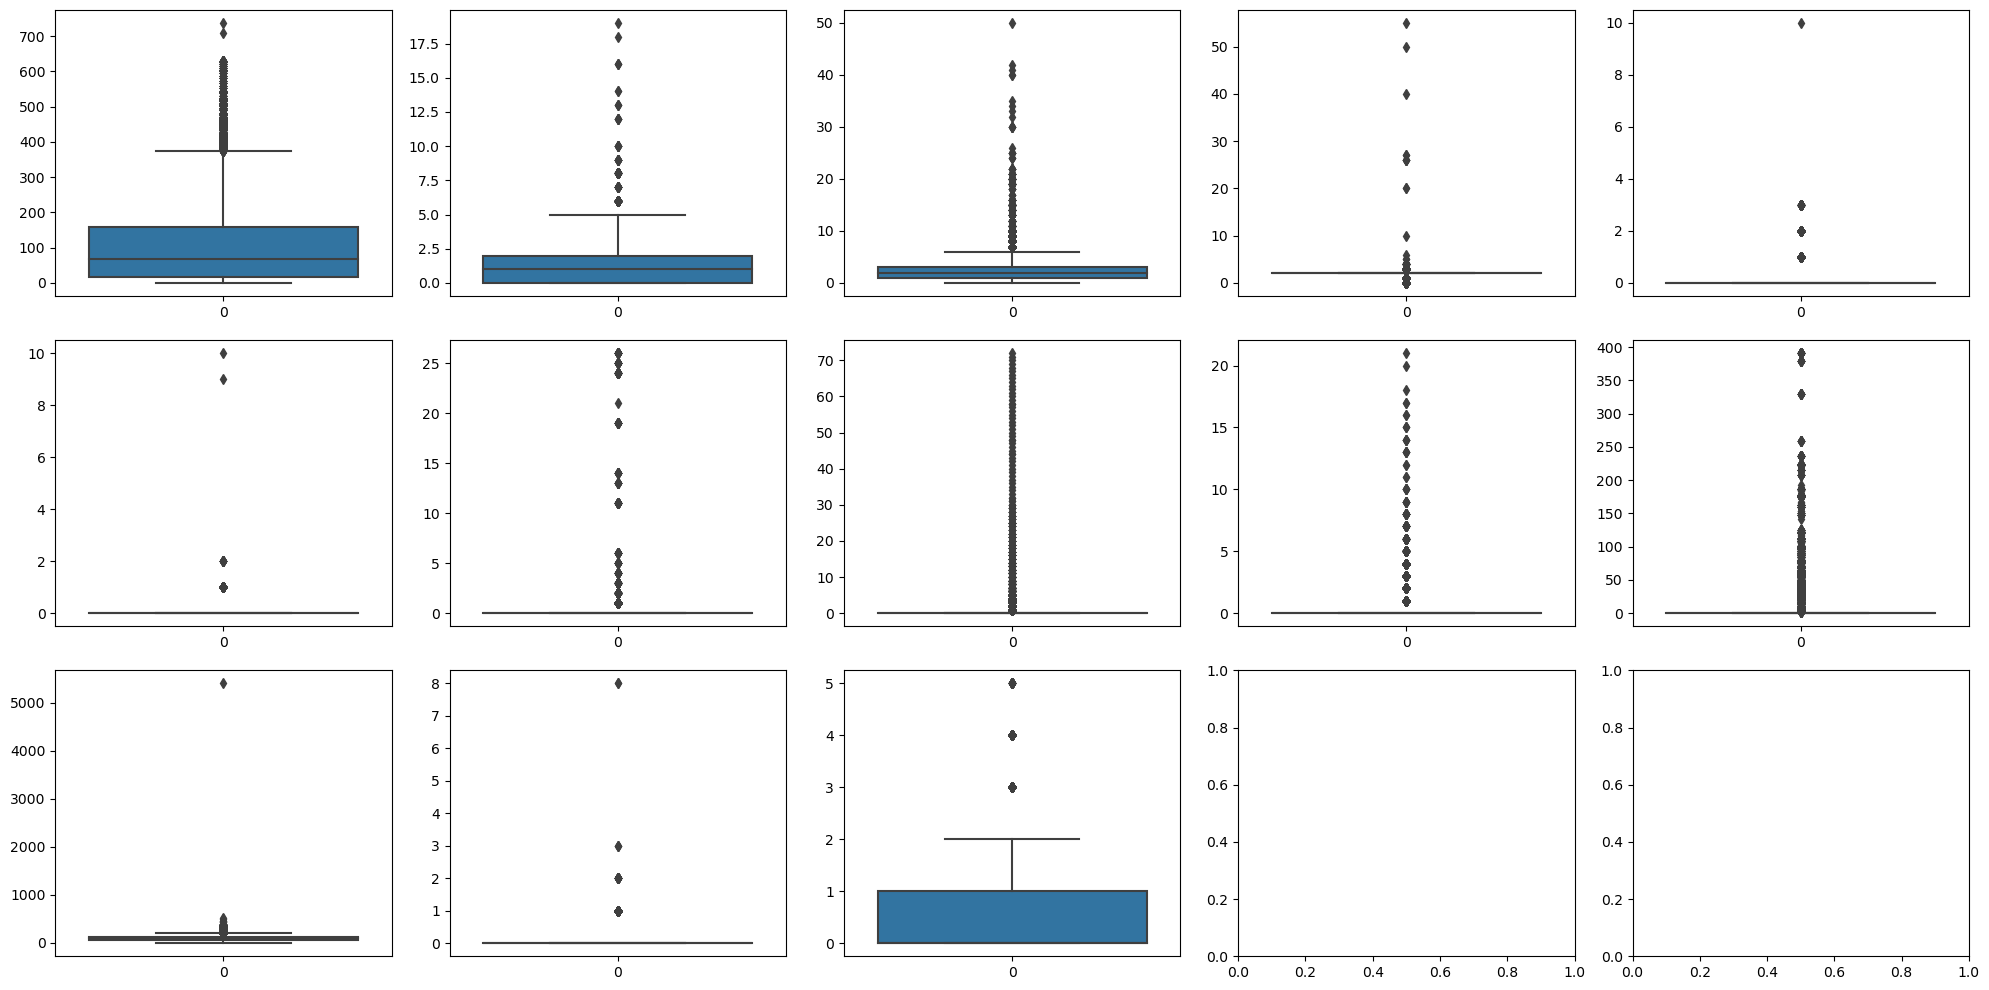

In [124]:
fig, ax= plt.subplots(3,5, figsize=(20,10))

for i, subplot in zip(numerical.columns, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    
plt.tight_layout()
plt.show()

## There are presence of outliers

# Feature Engineering

babies and children are combined for a more meaningful data

In [125]:
df['kids'] = df['children'] + df['babies'] # combining kids and babies

In [126]:
df['kids'].value_counts()

0.0     110058
1.0       5446
2.0       3772
3.0        111
10.0         2
9.0          1
Name: kids, dtype: int64

In [127]:
df = df.drop(['children','babies'],axis=1)

In [128]:
df['total_members'] = df['kids'] + df['adults']

combining the kids and adults to get the family size and coverting them to object data type based on the family size
for better understanding

In [129]:
def categorize_family(value):
    if value < 3:
        return 'small family'
    elif 3 <= value <= 5:
        return 'medium family'
    else:
        return 'large family'

In [130]:
df['family_size'] = df['total_members'].apply(categorize_family)

In [131]:
df = df.drop(['adults','kids'],axis=1)

In [132]:
df = df.drop('total_members',axis=1)

Changing the months according to seasons

In [133]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [134]:
def season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    else:
        return 'Unknown'

In [135]:
df['season'] = df['arrival_date_month'].apply(season)

dropping the columns arrival date year, arrival date month, arrival date day of month as
they are redundant with the column reservation status date

In [136]:
df = df.drop(['arrival_date_year','arrival_date_month',
              'arrival_date_week_number','arrival_date_day_of_month'],axis=1)

If the room type is assigned as same as the reserved its denoted as same else different

In [137]:
df['room_type'] = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'reserved and assigned are same', 'reserved and assigned are different')

In [138]:
df = df.drop(['reserved_room_type','assigned_room_type'],axis=1)

grouping the rows where the frequency is very less

In [139]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [140]:
df['market_segment'] = df['market_segment'].replace({'Complementary':'other','Aviation':'other','Undefined':'other'})

In [141]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [142]:
df['distribution_channel'] = df['distribution_channel'].replace({'GDS':'other','Undefined':'other'})

In [143]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [144]:
df['meal'] = df['meal'].replace({'FB':'other','Undefined':'other'})

seperating the holidays and non holidays

In [145]:
df['Holidays'] = 'Non Holiday'
df.loc[df['reservation_status_date'].str.contains('-07-04'), 'Holidays'] = '4th of July'
df.loc[df['reservation_status_date'].str.contains('-01-01'), 'Holidays'] = "New Year's Day"
df.loc[df['reservation_status_date'].str.contains('-12-25'), 'Holidays'] = 'Christmas Day'
df.loc[df['reservation_status_date'].str.contains('-11-04'), 'Holidays'] = 'Thanksgiving Day'

grouping the countries with their continents

In [146]:
africa = ['DZA', 'AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD', 'COM', 'COG', 'COD', 'CIV', 'DJI', 'EGY', 'GNQ', 'ERI', 'SWZ', 'ETH', 'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'LBY', 'MDG', 'MWI', 'MLI', 'MRT', 'MUS', 'MAR', 'MOZ', 'NAM', 'NER', 'NGA', 'RWA', 'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA', 'TGO', 'TUN', 'UGA', 'ZMB', 'ZWE']
asia = ['AFG', 'ARM', 'AZE', 'BHR', 'BGD', 'BTN', 'BRN', 'KHM', 'CHN', 'CYP', 'GEO', 'IND', 'IDN', 'IRN', 'IRQ', 'ISR', 'JPN', 'JOR', 'KAZ', 'KWT', 'KGZ', 'LAO', 'LBN', 'MYS', 'MDV', 'MNG', 'MMR', 'NPL', 'PRK', 'OMN', 'PAK', 'PSE', 'PHL', 'QAT', 'SAU', 'SGP', 'KOR', 'LKA', 'SYR', 'TWN', 'TJK', 'THA', 'TLS', 'TUR', 'TKM', 'ARE', 'UZB', 'VNM', 'YEM']
europe = ['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT']
north_america = ['CAN', 'USA', 'MEX']
central_america_caribbean = ['ATG', 'BHS', 'BRB', 'BLZ', 'CRI', 'CUB', 'DMA', 'DOM', 'SLV', 'GRD', 'GTM', 'HTI', 'HND', 'JAM', 'NIC', 'PAN', 'KNA', 'LCA', 'VCT', 'TTO']
south_america = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN']
oceania = ['AUS', 'FJI', 'KIR', 'MHL', 'FSM', 'NRU', 'NZL', 'PLW', 'PNG', 'WSM', 'SLB', 'TON', 'TUV', 'VUT']

In [147]:
def countries(i):
        if i in africa:
            return 'Africa'
        elif i in asia:
            return 'Asia'
        elif i in europe:
            return 'Europe'
        elif i in north_america:
            return 'North America'
        elif i in central_america_caribbean:
            return 'Central America and Caribbean'
        elif i in south_america:
            return 'South America'
        elif i in oceania:
            return 'Oceania'
        else:
            return 'Other Regions'

In [148]:
df['region']=df['country'].apply(countries)


In [149]:
df = df.drop('country',axis=1)

grouping the agents based on the number of bookings they have done

In [150]:
agent_counts = df.groupby('agent')['is_canceled'].count()
sorted_agent_counts = agent_counts.sort_values(ascending=False)

In [151]:
sorted_agent_counts.head()

agent
9.0      48301
240.0    13922
1.0       7191
14.0      3640
7.0       3539
Name: is_canceled, dtype: int64

In [152]:
sorted_agent_counts.describe()

count      333.000000
mean       358.528529
std       2800.561550
min          1.000000
25%          3.000000
50%         24.000000
75%        100.000000
max      48301.000000
Name: is_canceled, dtype: float64

In [153]:
df['agent'] = pd.cut(df['agent'],bins=[0,3,100,58301],labels=['agents with lower booking count','agents with moderate booking count','agents with higher booking count'])

In [154]:
df

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,family_size,season,room_type,Holidays,region
0,Resort Hotel,0,342,0,0,BB,Direct,Direct,0,0,0,3,No Deposit,agents with moderate booking count,0,Transient,0.00,0,0,2015-07-01,small family,Summer,reserved and assigned are same,Non Holiday,Europe
1,Resort Hotel,0,737,0,0,BB,Direct,Direct,0,0,0,4,No Deposit,agents with moderate booking count,0,Transient,0.00,0,0,2015-07-01,small family,Summer,reserved and assigned are same,Non Holiday,Europe
2,Resort Hotel,0,7,0,1,BB,Direct,Direct,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,75.00,0,0,2015-07-02,small family,Summer,reserved and assigned are different,Non Holiday,Europe
3,Resort Hotel,0,13,0,1,BB,Corporate,Corporate,0,0,0,0,No Deposit,agents with higher booking count,0,Transient,75.00,0,0,2015-07-02,small family,Summer,reserved and assigned are same,Non Holiday,Europe
4,Resort Hotel,0,14,0,2,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with higher booking count,0,Transient,98.00,0,1,2015-07-03,small family,Summer,reserved and assigned are same,Non Holiday,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,BB,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,agents with higher booking count,0,Transient,96.14,0,0,2017-09-06,small family,Summer,reserved and assigned are same,Non Holiday,Europe
119386,City Hotel,0,102,2,5,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,225.43,0,2,2017-09-07,medium family,Summer,reserved and assigned are same,Non Holiday,Europe
119387,City Hotel,0,34,2,5,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,157.71,0,4,2017-09-07,small family,Summer,reserved and assigned are same,Non Holiday,Europe
119388,City Hotel,0,109,2,5,BB,Online TA,TA/TO,0,0,0,0,No Deposit,agents with moderate booking count,0,Transient,104.40,0,0,2017-09-07,small family,Summer,reserved and assigned are same,Non Holiday,Europe


In [155]:
df = df.drop('reservation_status_date',axis=1)

In [156]:
list1 = ['hotel','meal','market_segment','distribution_channel','deposit_type','agent','customer_type','family_size','season','room_type','region','Holidays']

encoded_df = pd.get_dummies(df[list1], columns=list1)

df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=list1, inplace=True)


In [157]:
df['is_repeated_guest'] = df['is_repeated_guest'].astype(int)

In [158]:
x = df.drop('is_canceled',axis=1)
y = df['is_canceled']

In [159]:
y = y.astype(int)

In [160]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=1)

In [161]:
xtrain.shape,ytrain.shape

((83573, 59), (83573,))

In [162]:
xtest.shape,ytest.shape

((35817, 59), (35817,))

## To reduce the skewness, we are transforming the xtrain and xtest seperately to avoid data leakage

In [163]:
columns_to_transform = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','booking_changes',
                      'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

In [164]:
pt = PowerTransformer()

In [165]:
for i in columns_to_transform:
    xtrain[i] = pt.fit_transform(xtrain)

In [166]:
for i in columns_to_transform:
    xtest[i] = pt.fit_transform(xtest)

In [167]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [168]:
ypred = model.predict(xtest)

In [169]:
from sklearn.metrics import classification_report

In [170]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85     22654
           1       0.85      0.49      0.62     13163

    accuracy                           0.78     35817
   macro avg       0.80      0.72      0.73     35817
weighted avg       0.79      0.78      0.76     35817



In [171]:
plt.pie(df['arrival_date_year'], colors=palette_color, autopct='%.0f%%')
  
plt.show()

KeyError: 'arrival_date_year'